Task 1.1


In [36]:
import numpy as np
from matplotlib import pyplot as plt
from gradient_descent import gradient_descent, regression
from linear_cost import linear_cost, linear_cost_gradient

# task 1.1

# Cargar un archivo CSV utilizando la función genfromtxt de NumPy
data = np.genfromtxt('kc_house_data.csv', delimiter=',')
data = np.array(data)
# limpiar la data
data = data[~np.isnan(data[:,5])]
data = data[~np.isnan(data[:,2])]

# asignar variables a comparar
x = data[:,5]
y = data[:,2]

# limpiar y acomodar
x = x[~np.isnan(x)]
y = y[~np.isnan(y)]

x = x.reshape((-1, 1))
y = y.reshape((-1, 1))

print(x)
print(y)
print(x.shape)
print(y.shape)


[[1180.]
 [2570.]
 [ 770.]
 ...
 [1020.]
 [1600.]
 [1020.]]
[[221900.]
 [538000.]
 [180000.]
 ...
 [402101.]
 [400000.]
 [325000.]]
(21613, 1)
(21613, 1)


Task 1.2

In [37]:

# task 1.2 implementar regresion

cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

TRAINING_SET_SIZE = x.shape[0]

X = np.hstack((np.ones_like(x), x))

theta_0 = np.random.rand(X.shape[1], 1)
theta_0 = theta_0[~np.isnan(theta_0)]
theta_0 = theta_0.reshape((theta_0.shape[0], 1))


recta = np.array([[0], 
                  [TRAINING_SET_SIZE]])

model = np.hstack((
    np.ones((2, 1)),
    recta
))


task 1.3

C:\Users\paqui\AppData\Local\Temp\ipykernel_3224\1341236201.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X, y, "ro", color='blue')


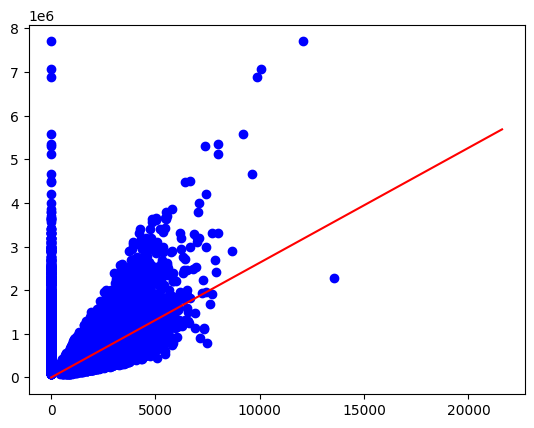

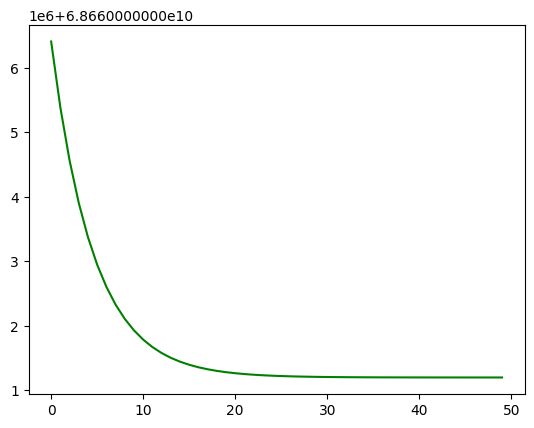

In [39]:

# task 1.3 

thetas, costs = regression(
    X,
    y,
    theta_0,
    cost,
    grad,
    step=0.00000001,
    n=50
)


plt.plot(X, y, "ro", color='blue')
plt.plot(recta, model @ thetas, color="red")
plt.show()

plt.plot(costs, color="green")
plt.show()


task 1.4

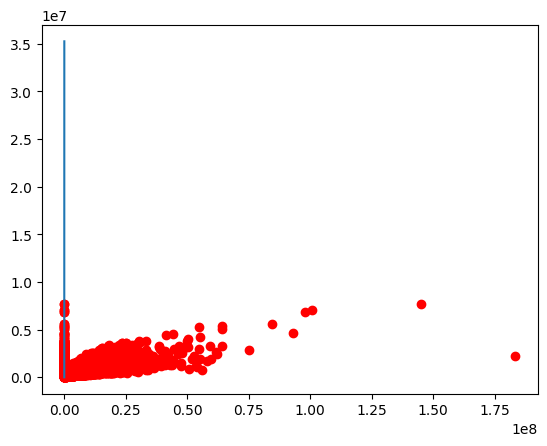

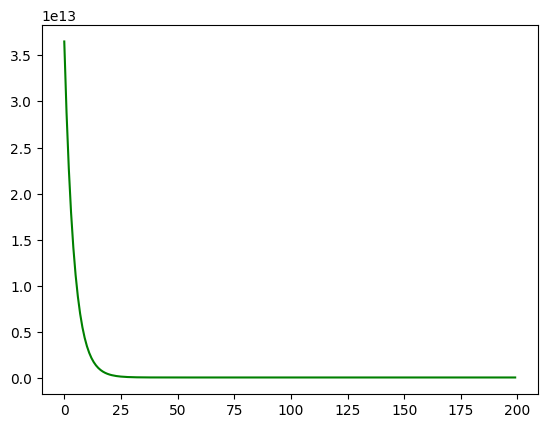

In [42]:
# task 1.4 cross validation

X = np.hstack((np.ones_like(x), x))
X = np.hstack((
    X, 
    X[:,1].reshape((X.shape[0], 1)) ** 2
))


theta_0 = np.random.rand(X.shape[1], 1) 
theta_0 = theta_0[~np.isnan(theta_0)]
theta_0 = theta_0.reshape((theta_0.shape[0], 1))

thetas, costs = regression(
    X,
    y,
    theta_0,
    cost,
    grad,
    step=0.000000000000001,
    n=200
)

recta = np.array([[0], [len(X)]]) # recta
model = np.hstack((               # model
    np.ones((2, 1)),
    recta
))

model = np.hstack((  
    model,
    model[:, 1].reshape((model.shape[0], 1)) ** 2
))

plt.plot(X, y, "ro")
plt.plot(recta, model @ thetas)
plt.show()

plt.plot(costs, color="green")
plt.show()


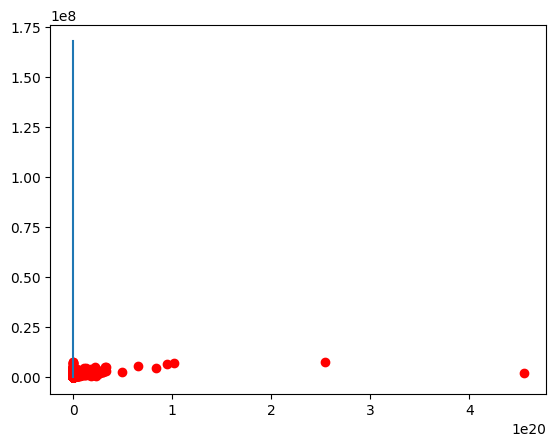

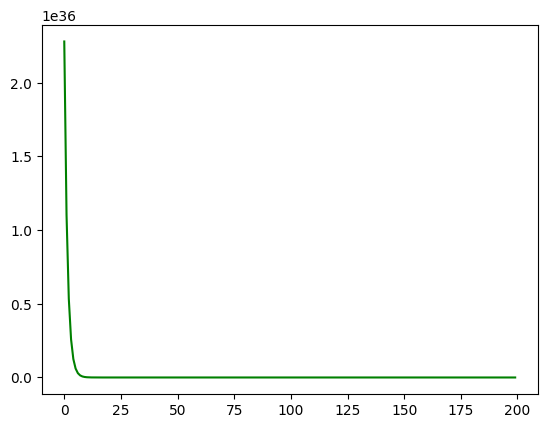

In [43]:
# con otra funcion mas grande

X = np.hstack((np.ones_like(x), x))
X = np.hstack((
    X, 
    X[:,1].reshape((X.shape[0], 1)) ** 5
))


theta_0 = np.random.rand(X.shape[1], 1) 
theta_0 = theta_0[~np.isnan(theta_0)]
theta_0 = theta_0.reshape((theta_0.shape[0], 1))

thetas, costs = regression(
    X,
    y,
    theta_0,
    cost,
    grad,
    step=0.00000000000000000000000000000000000001,
    n=200
)

recta = np.array([[0], [len(X)]]) # recta
model = np.hstack((               # model
    np.ones((2, 1)),
    recta
))

model = np.hstack((  
    model,
    model[:, 1].reshape((model.shape[0], 1)) ** 5
))

plt.plot(X, y, "ro")
plt.plot(recta, model @ thetas)
plt.show()

plt.plot(costs, color="green")
plt.show()


task 1.5

### analisis

Se determino por cross validation que el grado de polinomio que mejor describe la nube de puntos es lineal, el cual describe con mayor precision la direccion de la nube de puntos, los demas parecen desviarse por una tendencia muy superior a los valores verdaderos. 
la grafica muestra como la nube sigue esta tendencia determinada por el modelo marcado en rojo y azul. 